# Equally weighted S&P500 strategy

In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [4]:
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
tables = pd.read_html(url)
sp500_table = tables[0]

output_file = 'sp500_companies.csv'
sp500_table.to_csv(output_file, index=False)

In [6]:
sp500 = pd.read_csv('sp500_companies.csv')
symbols = sp500['Symbol']

symbols.head()

0     MMM
1     AOS
2     ABT
3    ABBV
4     ACN
Name: Symbol, dtype: object

In [9]:
tickers_string = ' '.join(symbols.to_list())
all_tickers = yf.Tickers(tickers_string)

all_tickers.tickers['AAPL'].info['marketCap']

3019131060224

In [11]:
data = []

for ticker in symbols:
    try:
        data.append([
            ticker,
            all_tickers.tickers[ticker].info['previousClose'],
            all_tickers.tickers[ticker].info['marketCap']
        ])
    except KeyError:
        continue

cols = ['ticker', 'price', 'market_cap']
df = pd.DataFrame(data, columns=cols)

In [12]:
df.head()

,ticker,price,market_cap
0,MMM,98.22,55811993600
1,AOS,80.88,11892003840
2,ABT,104.27,187149385728
3,ABBV,168.57,299173675008
4,ACN,291.74,181325447168


In [13]:
portfolio_size = 1_000_000
position_size = portfolio_size / len(df)
print(position_size)

1996.007984031936


In [19]:
df['shares_to_buy'] = position_size // df['price']

In [20]:
df

,ticker,price,market_cap,shares_to_buy
0,MMM,98.22,55811993600,20.0
1,AOS,80.88,11892003840,24.0
2,ABT,104.27,187149385728,19.0
3,ABBV,168.57,299173675008,11.0
4,ACN,291.74,181325447168,6.0
...,...,...,...,...
496,XYL,136.87,33292824576,14.0
497,YUM,140.83,39420030976,14.0
498,ZBRA,307.49,15468497920,6.0
499,ZBH,113.37,23317211136,17.0


In [21]:
total_portfolio_value = (df['price'] * df['shares_to_buy']).sum()
print(total_portfolio_value)

947055.4099999999


<Axes: xlabel='shares_to_buy', ylabel='ticker'>

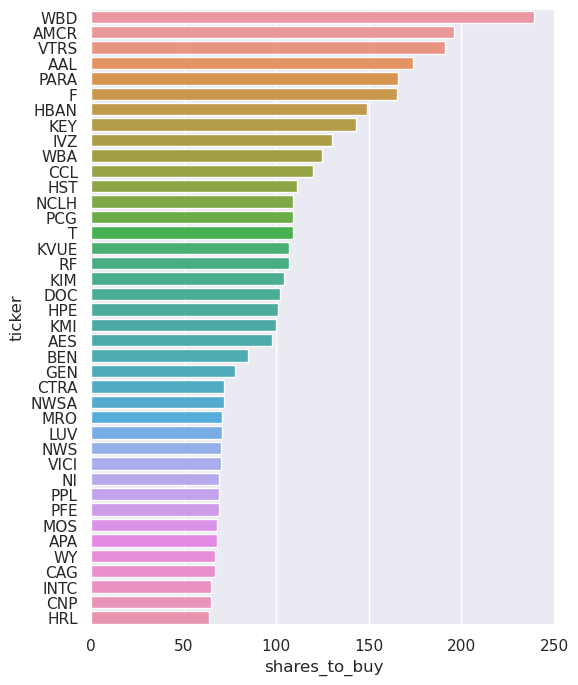

In [23]:
plt.figure(figsize=(6, 8))
sns.barplot(df.sort_values(by='shares_to_buy', ascending=False).iloc[:40], x='shares_to_buy', y='ticker')

In [25]:
df.to_csv('trade_information.csv', index=False)